In [2]:
# Import Modules
import os
import pandas as pd
import numpy as np
import edaTools as ET

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.offline import init_notebook_mode
# pio.renderers.default='notebook'
init_notebook_mode(connected = False)

In [3]:
## Load Data
master_file = ".\DataSource\Master_Details.csv"
master_df = pd.read_csv(master_file)
master_df.head()

Date                 Title                    Address     City State  \
0  2/27/2019  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
1  2/27/2019  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
2  2/27/2019  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
3  2/27/2019  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
4  2/27/2019  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   

       Beds       Baths          Rent         SQFT  
0  1Bedroom   1Bathroom  $1,041-5,000    624 Sq Ft  
1  1Bedroom   1Bathroom  $1,219-5,000    825 Sq Ft  
2  1Bedroom   1Bathroom  $1,380-5,000  1,125 Sq Ft  
3      2BRs  2Bathrooms  $1,418-5,000  1,139 Sq Ft  
4      2BRs  2Bathrooms  $1,773-5,000  1,299 Sq Ft

In [4]:
## Format Columns
columns = master_df.columns
for column in columns:
    master_df[column] = ET.format_column(series=master_df[column], col=column)

In [5]:
## Add latitude and longitude to data
# Note: Computationally expensive; 1 sec per address

# Combine Address info into one column
geo_sr = master_df["Address"] + master_df["City"] + master_df["State"]
short_list = list(geo_sr.unique())
geo_sr = ET.get_latlong(short_list)
geo_sr["Address"] = geo_sr["Address"].str.replace("Austin,TX", "")
# Combine Lat and Long info back to df
master_df = pd.merge(master_df, geo_sr, on="Address", how="left")
master_df.head()

Date                 Title                    Address     City State  \
0  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
1  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
2  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
3  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
4  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   

   Beds  Baths    Rent    SQFT   latitude  longitude  
0     1    1.0  1301.0   624.0  30.369441 -97.891081  
1     1    1.0  1523.0   825.0  30.369441 -97.891081  
2     1    1.0  1725.0  1125.0  30.369441 -97.891081  
3     2    2.0  1772.0  1139.0  30.369441 -97.891081  
4     2    2.0  2216.0  1299.0  30.369441 -97.891081

In [6]:
## Add column for price per square foot
# master_df["PPSF"] = master_df["Rent"]/master_df["SQFT"]
# Not Necessary

In [7]:
# master_df["Date"] = master_df["Date"].dt.strftime("%b %y")

In [8]:
master_df.head()

Date                 Title                    Address     City State  \
0  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
1  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
2  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
3  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   
4  Feb 19  Tacara Steiner Ranch  4306 N Quinlan Park Rd,\r  Austin,    TX   

   Beds  Baths    Rent    SQFT   latitude  longitude  
0     1    1.0  1301.0   624.0  30.369441 -97.891081  
1     1    1.0  1523.0   825.0  30.369441 -97.891081  
2     1    1.0  1725.0  1125.0  30.369441 -97.891081  
3     2    2.0  1772.0  1139.0  30.369441 -97.891081  
4     2    2.0  2216.0  1299.0  30.369441 -97.891081

In [9]:
# Handle missing values (KNN imputer)
master_df = ET.fill_nan(master_df)


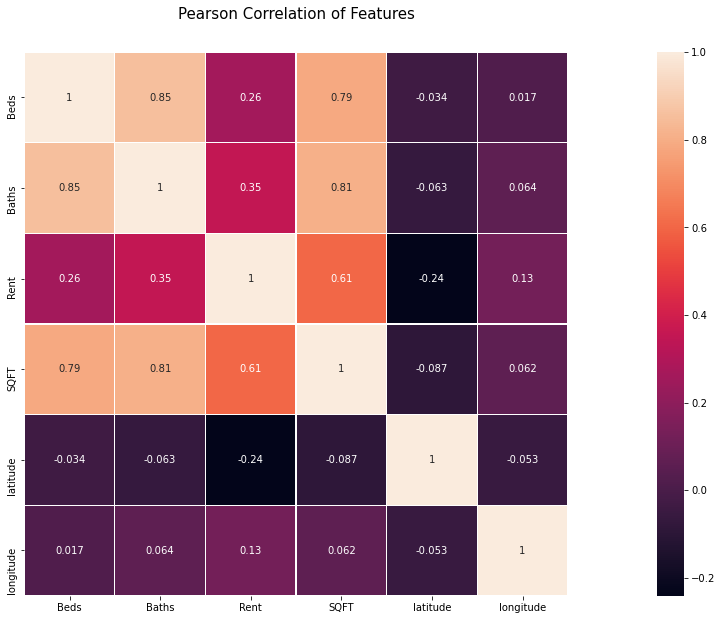

In [10]:
## Feature Heatmap
# In order to use linear regression, you need to check if there is correlation between the features
plt.figure(figsize=(32, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(master_df.corr(method='pearson'), linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=True)



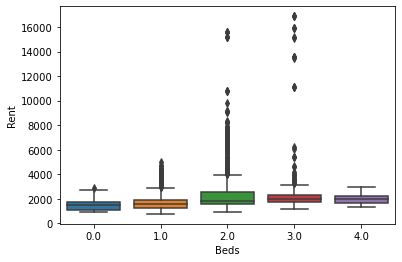

In [11]:
# Assumption: more bedrooms means higher rent
sb.boxplot(x=master_df["Beds"], y=master_df["Rent"])
plt.show()


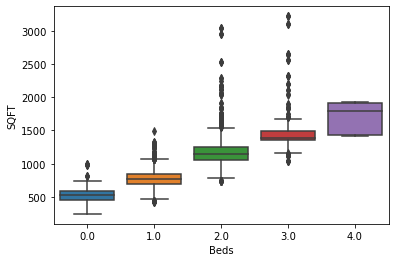

In [12]:
# Boxplot and Scatter comparing bedrooms and sqft
# Assumption: more bedrooms means more sqft
sb.boxplot(x="Beds", y="SQFT", data=master_df)
plt.show()
# hue="Date"

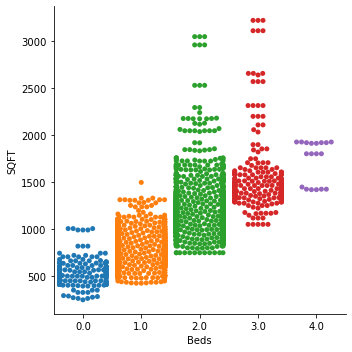

In [13]:
sb.catplot(x="Beds", y="SQFT",
            kind="swarm", data=master_df);

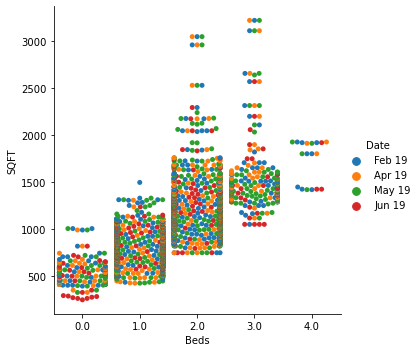

In [14]:
sb.catplot(x="Beds", y="SQFT",
            kind="swarm", hue="Date", data=master_df);

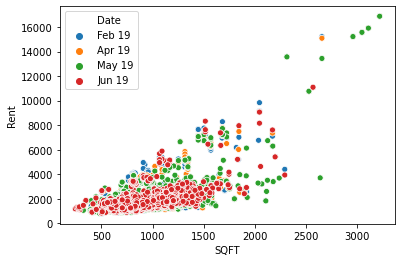

In [15]:
# Assumption: more sqft means higher rent
# master_df[["SQFT", "Rent"]].plot.scatter(x="SQFT", y="Rent")
# plt.show()

sb.scatterplot(x="SQFT", y="Rent", hue="Date", data=master_df)
plt.show()


In [16]:
## Plot Map with Data
fig = px.scatter_mapbox(master_df, lat="latitude", lon="longitude", hover_name="Title",
                        hover_data=["Beds", "Baths", "Rent"], color="Rent", size="SQFT",
                        color_discrete_sequence=px.colors.diverging.balance, size_max=20, zoom=10, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [17]:
# Examine One Bedroom listings
one_beds = master_df[master_df["Beds"] == 1].copy()

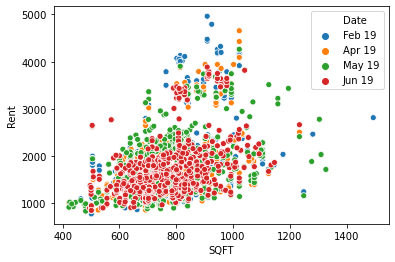

In [18]:
sb.scatterplot(x="SQFT", y="Rent", hue="Date", data=one_beds)
plt.show()

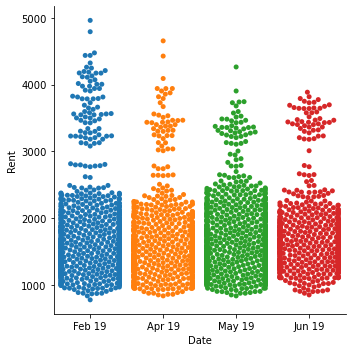

In [19]:
sb.catplot(x="Date", y="Rent",
            kind="swarm", data=one_beds);

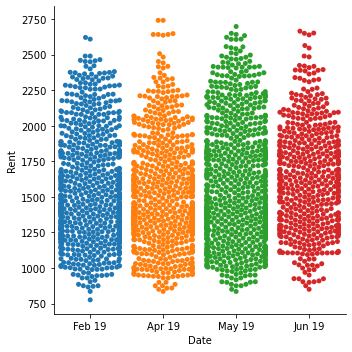

In [20]:
# Cut out extreme cases
sb.catplot(x="Date", y="Rent",
            kind="swarm", data=one_beds[one_beds["Rent"] < 2750]);

In [21]:
## Plot Map with Data
fig = px.scatter_mapbox(one_beds, lat="latitude", lon="longitude", hover_name="Title",
                        hover_data=["Beds", "Baths", "Rent"], color="Rent", size="SQFT",
                        color_discrete_sequence=px.colors.diverging.balance, size_max=20, zoom=10, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [22]:
avg_sqft = one_beds["SQFT"].mean()
avg_sqft

774.6699393358876

In [23]:
avg_rent = one_beds["Rent"].mean()
avg_rent

1716.555871773176

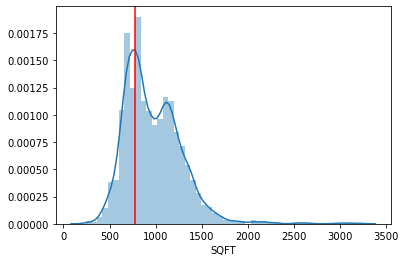

In [24]:
sb.distplot(master_df["SQFT"])
plt.axvline(avg_sqft, color="red")

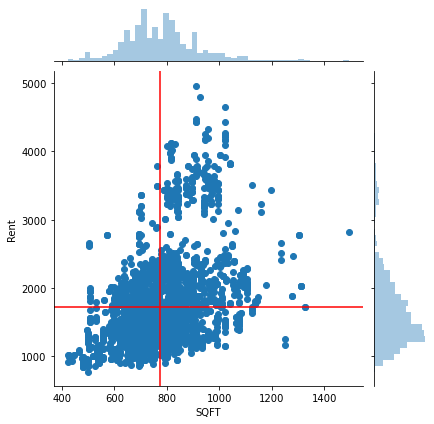

In [25]:
scat = sb.jointplot(x="SQFT", y="Rent", data=one_beds);
scat.ax_joint.axvline(avg_sqft, color="red")
scat.ax_joint.axhline(avg_rent, color="red")

In [26]:


# creates 10 clusters using hierarchical clustering.
agc = AgglomerativeClustering(n_clusters =10, affinity='euclidean', linkage='ward')
master_df['cluster'] = agc.fit_predict(master_df[['latitude','longitude']])

# creates 10 clusters using k-means clustering algorithm.
# kmeans = KMeans(10)
# clusters = kmeans.fit_predict(test[['latitude','longitude']])
# master_df['cluster'] = kmeans.predict(test[['latitude','longitude']])

In [27]:
fig = px.scatter_mapbox(master_df, lat="latitude", lon="longitude", hover_name="Title",
                        hover_data=["Beds", "Baths", "Rent"], color="cluster", size="Rent",
                        size_max=20, zoom=10, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [28]:
mode = lambda x:x.value_counts().index[0]
agg_rule = {"Rent" : ["mean", "median", "min", "max", mode], 
            "SQFT" : ["mean", "median", "min", "max", mode],
            "Beds": ["median", "min", "max", mode,"count"]}
new_cols = ["Rent Mean", "Rent Median", "Rent Min", "Rent Max", "Rent Mode",
           "SQFT Mean", "SQFT Median", "SQFT Min", "SQFT Max", "SQFT Mode",
           "Beds Median", "Beds Min", "Beds Max", "Beds Mode", "Count"]
overall_summary = master_df.copy().groupby("cluster")[["Rent", "SQFT", "Beds"]].agg(agg_rule).round(2)
overall_summary.columns = overall_summary.columns.droplevel(0)
overall_summary.columns = new_cols
# overall_summary.reset_index(inplace=True)

In [29]:
# trace = go.Table(
#     header=dict(values=overall_summary.columns),
#     cells=dict(values=[overall_summary[col] for col in overall_summary.columns]))
# layout = dict(autosize=True)
# fig = go.Figure(data=[trace], layout=layout)
# fig.show()

In [30]:
## Overall Summary Table

fig = ff.create_table(overall_summary, index=True, index_title="Cluster")
fig.layout.width = 1500
fig.show()

In [31]:
# Examine 1-Bedroom Listings
agg_rule = {"Rent" : ["mean", "median", "min", "max", mode], 
            "SQFT" : ["mean", "median", "min", "max", mode, "count"]}
new_cols = ["Rent Mean", "Rent Median", "Rent Min", "Rent Max", "Rent Mode",
           "SQFT Mean", "SQFT Median", "SQFT Min", "SQFT Max", "SQFT Mode", "Count"]
onebd_summary = master_df[master_df["Beds"] == 1].groupby("cluster")[["Rent", "SQFT"]].agg(agg_rule).round(2)
onebd_summary.columns = onebd_summary.columns.droplevel(0)
onebd_summary.columns = new_cols

In [32]:
## One Bedroom Summary Table
fig = ff.create_table(onebd_summary, index=True, index_title="Cluster")
fig.layout.width = 1500
fig.show()

In [33]:
# normalize features
pt = preprocessing.PowerTransformer(standardize=False)
ml_df = master_df.select_dtypes(include=[np.number]).copy()
y = ml_df["Rent"]
X = ml_df.drop(labels=["latitude","longitude", "Rent"], axis=1)
X_tran = pt.fit_transform(X)

C:\Users\xrchr\Miniconda3\envs\aptEnv\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning:

divide by zero encountered in log



In [34]:
clf = ET.ml_alg(X_tran, y)

In [35]:
# 1-bed, 1-bath, average sq-ft, cluster-0
x_predict = pt.transform(np.array([1, 1, avg_sqft, 6]).reshape(1, -1))
x_predict

array([[0.81832025, 0.35589166, 0.09808594, 3.00130563]])

In [36]:
clf.predict(x_predict).round(2)


array([1550.02])

In [37]:
rent_by_area = dict()
for i in range(0,7):
    x_pred = pt.transform(np.array([1, 1, avg_sqft, i]).reshape(1, -1))
    rent_by_area[i] = clf.predict(x_pred).round(2)
rent_by_area

{0: array([1845.43]),
 1: array([1766.32]),
 2: array([1708.25]),
 3: array([1660.66]),
 4: array([1619.61]),
 5: array([1583.12]),
 6: array([1550.02])}